## Build the perfect model to save Hamid !

### Step 1: Explore the Dataset

In [475]:
import pandas as pd
import numpy as np

df=pd.read_csv("./bricolo_company_train.csv",index_col=False)

df= df.drop_duplicates()
df=df.drop("id",axis=1)

  


In [476]:
for col in df.columns:
    num_missing = df[col].isnull().sum()
    print(col, num_missing)

satisfied 1097
evaluation 0
projects 0
work_hours 0
total_time_spent 0
had_accident 0
still_working 0
got_promoted 0
department 0
salary_range 0


In [446]:
# here we wanted to extract all the project names one by one
def extract_project_names(names):
  names = ','.join(names).split(',')

  # Remove leading/trailing whitespaces from each name
  names = [name.strip() for name in names]

  # Get unique names using a set
  unique_names = set(names)
  return  list(unique_names)

unique_names= extract_project_names(df.projects.unique())


# we will create a new column named nproject
df.insert(column="nprojects",loc=6 ,value=np.array([0 for i in range(df.shape[0])]))

for v, name in enumerate(unique_names):
    df.insert(column=name, loc=v + 7, value=np.array([0 for i in range(df.shape[0])]))

    for i, row in enumerate(df.values):
        if row[2].find(name) != -1:
            df.iloc[i, v + 7] = 1
        else:
            df.iloc[i, v + 7] = 0
        df.iloc[i,6]+=df.iloc[i,v+7]

# finnaly we add a new column called the nprojects


### Step 2: Preprocessing phase

In [477]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
one_hot_encoder = preprocessing.OneHotEncoder(sparse=True)


label_mapping = {
    'low': 0,
    'medium': 1,
    'high': 2
}
# we use label encoding for salaray range and department
df["salary_range"] = df["salary_range"].map(label_mapping)

df=df.join(pd.get_dummies(df.department))


df





,satisfied,evaluation,projects,work_hours,total_time_spent,had_accident,still_working,got_promoted,department,salary_range,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.1,0.84,"WebCamp,Raid Dorms Cook,Salah lFrog,AiFest23, ...",250,4,0,1,0,product_mng,0,0,0,0,0,0,0,1,0,0,0
1,0.57,0.68,"Penalizing System,Drug Design,WebCamp,AiFest23",154,3,1,0,0,management,1,0,0,0,0,1,0,0,0,0,0
2,0.39,0.48,"Drug Design, AiFest23",154,3,0,1,0,technical,0,0,0,0,0,0,0,0,0,0,1
3,0.91,0.68,"AiFest23,Smurfs ,SecCamp ,Drug Design",132,4,0,0,0,IT,1,1,0,0,0,0,0,0,0,0,0
4,0.82,0.97,"Smurfs ,Farmy, SecCamp , Drug Design ,WebCamp",263,5,0,1,0,technical,1,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,0.52,0.96,"SecCamp ,AiFest23,SecCamp ,Salah lFrog",246,3,0,0,0,support,0,0,0,0,0,0,0,0,0,1,0
10495,0.49,0.65,"WebCamp, Drug Design ,Drug Design,SecCamp",233,7,0,0,0,sales,1,0,0,0,0,0,0,0,1,0,0
10496,0.66,0.73,"Farmy,Smurfs,SecCamp , Drug Design ,Smurfs",249,2,0,0,0,support,1,0,0,0,0,0,0,0,0,1,0
10497,0.79,1.00,"SecCamp ,Raid Dorms Cook,Farmy,Drug Design",218,5,0,1,0,sales,0,0,0,0,0,0,0,0,1,0,0


In [478]:
# here we drop the unecessary features and we also label encode the 
df= df.drop("projects",axis=1)
df=df.drop("department",axis=1)
df.drop("projetcs")

In [449]:
df.salary_range


0        0
1        1
2        0
3        1
4        1
        ..
10494    0
10495    1
10496    1
10497    0
10498    0
Name: salary_range, Length: 10499, dtype: int64

In [450]:
# convert 0.......smth to 0.smth
import re
df["satisfied"] = df["satisfied"].apply(lambda x: float(re.sub(r'\.+(?=\d)', '.', x)) if isinstance(x, str) else x)

df["satisfied"].unique()

array([0.1       , 0.57      , 0.39      , 0.91      , 0.82      ,
       0.92      , 0.44      , 0.7       , 0.88      , 0.17      ,
              nan, 0.09      , 0.32      , 0.8       , 0.69      ,
       0.55      , 0.45      , 0.96      , 0.68      , 0.72      ,
       0.74      , 0.64      , 0.73      , 0.61      , 0.21      ,
       0.87      , 0.53      , 0.75      , 0.93      , 0.65      ,
       0.84      , 0.35      , 0.77      , 0.86      , 0.43      ,
       0.66      , 0.46      , 0.6       , 0.19      , 0.13      ,
       0.9       , 0.42      , 0.38      , 0.48      , 0.24      ,
       0.81      , 1.4532006 , 0.15      , 0.89      , 0.78      ,
       0.79      , 0.12      , 0.54      , 0.83      , 0.76      ,
       0.49      , 0.63      , 0.58      , 0.37      , 0.52      ,
       0.47      , 0.97      , 0.85      , 0.59      , 0.5       ,
       0.51      , 0.11      , 0.41      , 0.31      , 0.18      ,
       0.27      , 0.62      , 0.71      , 0.14      , 0.99   

### Step 3: Now, comes the modeling !

In [451]:
df

,satisfied,evaluation,work_hours,total_time_spent,had_accident,nprojects,Raid Dorms Cook,SecCamp,Smurfs,AiFest23,...,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.10,0.84,250,4,0,5,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0.57,0.68,154,3,1,4,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.39,0.48,154,3,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.91,0.68,132,4,0,4,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
4,0.82,0.97,263,5,0,5,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10494,0.52,0.96,246,3,0,3,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
10495,0.49,0.65,233,7,0,3,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10496,0.66,0.73,249,2,0,4,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
10497,0.79,1.00,218,5,0,4,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [452]:
# filling out missing data for the satisfied column



def fill_Nan(x):
  if( pd.isnull(x) ):return df.satisfied.mean()
  return x

df.satisfied=df.satisfied.apply(fill_Nan)
for col in df.columns:
    num_missing = df[col].isnull().sum()
    print(col, num_missing)




satisfied 0
evaluation 0
work_hours 0
total_time_spent 0
had_accident 0
nprojects 0
Raid Dorms Cook 0
SecCamp 0
Smurfs 0
AiFest23 0
Salah lFrog 0
WebCamp 0
Drug Design 0
Farmy 0
Penalizing System 0
still_working 0
got_promoted 0
salary_range 0
IT 0
RandD 0
accounting 0
hr 0
management 0
marketing 0
product_mng 0
sales 0
support 0
technical 0


In [453]:
print(df.satisfied.mean())
df.satisfied.unique()

0.6180265476322824


array([0.1       , 0.57      , 0.39      , 0.91      , 0.82      ,
       0.92      , 0.44      , 0.7       , 0.88      , 0.17      ,
       0.61802655, 0.09      , 0.32      , 0.8       , 0.69      ,
       0.55      , 0.45      , 0.96      , 0.68      , 0.72      ,
       0.74      , 0.64      , 0.73      , 0.61      , 0.21      ,
       0.87      , 0.53      , 0.75      , 0.93      , 0.65      ,
       0.84      , 0.35      , 0.77      , 0.86      , 0.43      ,
       0.66      , 0.46      , 0.6       , 0.19      , 0.13      ,
       0.9       , 0.42      , 0.38      , 0.48      , 0.24      ,
       0.81      , 1.4532006 , 0.15      , 0.89      , 0.78      ,
       0.79      , 0.12      , 0.54      , 0.83      , 0.76      ,
       0.49      , 0.63      , 0.58      , 0.37      , 0.52      ,
       0.47      , 0.97      , 0.85      , 0.59      , 0.5       ,
       0.51      , 0.11      , 0.41      , 0.31      , 0.18      ,
       0.27      , 0.62      , 0.71      , 0.14      , 0.99   

In [454]:
# we extract the Y values from the dataset 

Y=df.still_working.values
df=df.drop("still_working",axis=1)

# we extract the standarized values of X from the dataset
df=(df-df.mean())/df.std()
X=df.values
X

array([[-2.1542297 ,  0.72145269,  0.983715  , ..., -0.62259006,
        -0.41395032, -0.46701389],
       [-0.19971991, -0.21233453, -0.94068677, ..., -0.62259006,
        -0.41395032, -0.46701389],
       [-0.94825557, -1.37956856, -0.94068677, ..., -0.62259006,
        -0.41395032,  2.14105997],
       ...,
       [ 0.17454792,  0.07947397,  0.96366914, ..., -0.62259006,
         2.41551872, -0.46701389],
       [ 0.71515701,  1.65523991,  0.34224774, ...,  1.60604035,
        -0.41395032, -0.46701389],
       [ 1.50527799,  0.83817609,  0.36229359, ...,  1.60604035,
        -0.41395032, -0.46701389]])

In [455]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
# we split the training data and tesing data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)




In [456]:
# Initialze the estimators
clf1 = RandomForestClassifier(random_state=42)
clf2 = SVC(probability=True, random_state=42)
clf3 = LogisticRegression(random_state=42)
clf4 = DecisionTreeClassifier(random_state=42)
clf5 = KNeighborsClassifier()
clf6 = MultinomialNB()
clf7 = GradientBoostingClassifier(random_state=42)


In [457]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

param2 = {}
param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param2['classifier'] = [clf2]

param3 = {}
param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
param3['classifier__penalty'] = ['l2']
param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param3['classifier'] = [clf3]

param4 = {}
param4['classifier__max_depth'] = [5,10,25,None]
param4['classifier__min_samples_split'] = [2,5,10]
param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param4['classifier'] = [clf4]

param5 = {}
param5['classifier__n_neighbors'] = [2,5,10,25,50]
param5['classifier'] = [clf5]

param6 = {}
param6['classifier__alpha'] = [10**0, 10**1, 10**2]
param6['classifier'] = [clf6]

param7 = {}
param7['classifier__n_estimators'] = [10, 50, 100, 250]
param7['classifier__max_depth'] = [5, 10, 20]
param7['classifier'] = [clf7]

In [458]:
pipeline = Pipeline([('classifier', clf1)])
params = [param1, param2, param3, param4, param5, param6, param7]

In [459]:
%%time
# Train the grid search model
#gs = GridSearchCV(pipeline, params, cv=3, n_jobs=-1, scoring='roc_auc',verbose=10).fit(X_train, y_train)


CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.81 µs


In [460]:
print(gs.best_params_)
gs.best_score_

{'classifier': GradientBoostingClassifier(max_depth=5, random_state=42), 'classifier__max_depth': 5, 'classifier__n_estimators': 100}


0.9859200709286319

In [461]:
# as we can see the Gradient Boosting Classifier 
gradient_boost_classifier = GradientBoostingClassifier(random_state=42)
param7 = {}
param7['n_estimators'] = [10, 50, 100, 250,300]
param7["learning_rate"]=[0.1,0.01,0.001,0.05]
param7['max_depth'] = [5, 10, 20,25]
param7["loss"]=['log_loss', 'deviance', 'exponential']
grid_search = RandomizedSearchCV(gradient_boost_classifier, param7, cv=5,verbose=10,n_iter=20)

#grid_search.fit(X=X,y=Y,)

In [462]:
# get the best combination of params
#grid_search.best_params_


In [463]:
# get the best score
#grid_search.best_score_

In [464]:
# now we will retrain the best model with the best parameters
final_classifer=GradientBoostingClassifier(loss="log_loss",learning_rate=0.1,max_depth=10,n_estimators=300)
final_classifer.fit(X_train,y_train)
# 


GradientBoostingClassifier(max_depth=10, n_estimators=300)

Classification Report:
              precision    recall  f1-score   support

           0     0.9767    0.9962    0.9864      1600
           1     0.9872    0.9240    0.9545       500

    accuracy                         0.9790      2100
   macro avg     0.9819    0.9601    0.9705      2100
weighted avg     0.9792    0.9790    0.9788      2100



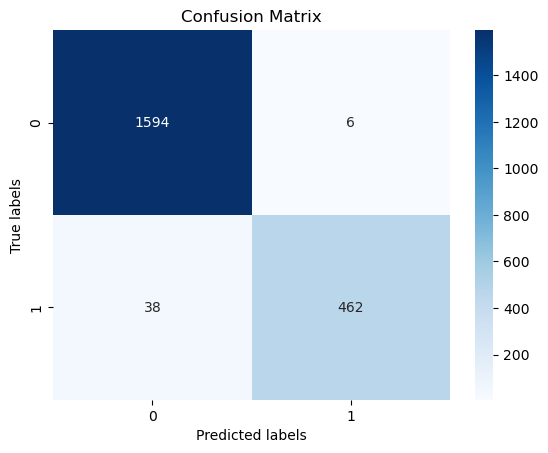

In [465]:
# model evaluation
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_model(model, X_test, y_test):
    # Predict the target variable for the test set
    y_pred = model.predict(X_test)

    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred, digits=4))

def confusion_matrix_model(model, X_test, y_test):
    # Predict the target variable for the test set
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    confusion_mat = confusion_matrix(y_test, y_pred)

    # Create a seaborn heatmap for the confusion matrix
    sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues")

    # Add labels, title, and axis ticks to the plot
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.title("Confusion Matrix")

    # Display the plot
    plt.show()
from sklearn.metrics import classification_report, confusion_matrix
evaluate_model(final_classifer,X_test,y_test)
confusion_matrix_model(final_classifer,X_test,y_test)

In [466]:
# now we will predict the probability of being still work or not 
test_data=pd.read_csv("./test.csv",index_col=False)
X=test_data.values
predictions=final_classifer.predict(X)
print(test_data)

         satisfied  evaluation  work_hours  total_time_spent  had_accident  \
0     4.648510e-16    1.432023    0.492426         -1.022266      2.457826   
1     1.113570e+00    0.495116   -0.705626         -1.022266     -0.406773   
2     3.180387e-01    1.549137    0.252816         -1.022266     -0.406773   
3    -8.543228e-01   -1.437254   -0.945237         -0.335772     -0.406773   
4     1.071700e+00    0.260890    1.051517         -1.022266      2.457826   
...            ...         ...         ...               ...           ...   
4495  9.879595e-01    0.553673    1.171322         -0.335772     -0.406773   
4496 -1.691724e+00   -1.671481    0.951680         -0.335772     -0.406773   
4497  6.948692e-01   -1.085914   -0.905302         -0.335772     -0.406773   
4498  1.322920e+00   -0.793131    0.732037         -1.022266     -0.406773   
4499  1.086884e-01   -0.968801    0.891777         -1.022266     -0.406773   

      nprojects   SecCamp  Salah lFrog  Drug Design    Smurfs  

In [467]:
# now submition file
data={
  "id":[i+1 for i in range(len(predictions))],
  "still_work":predictions
}
submission_dataframe=pd.DataFrame(data)

submission_dataframe.to_csv("submission.csv", index=False)




<AxesSubplot:title={'center':'Feature importance'}>

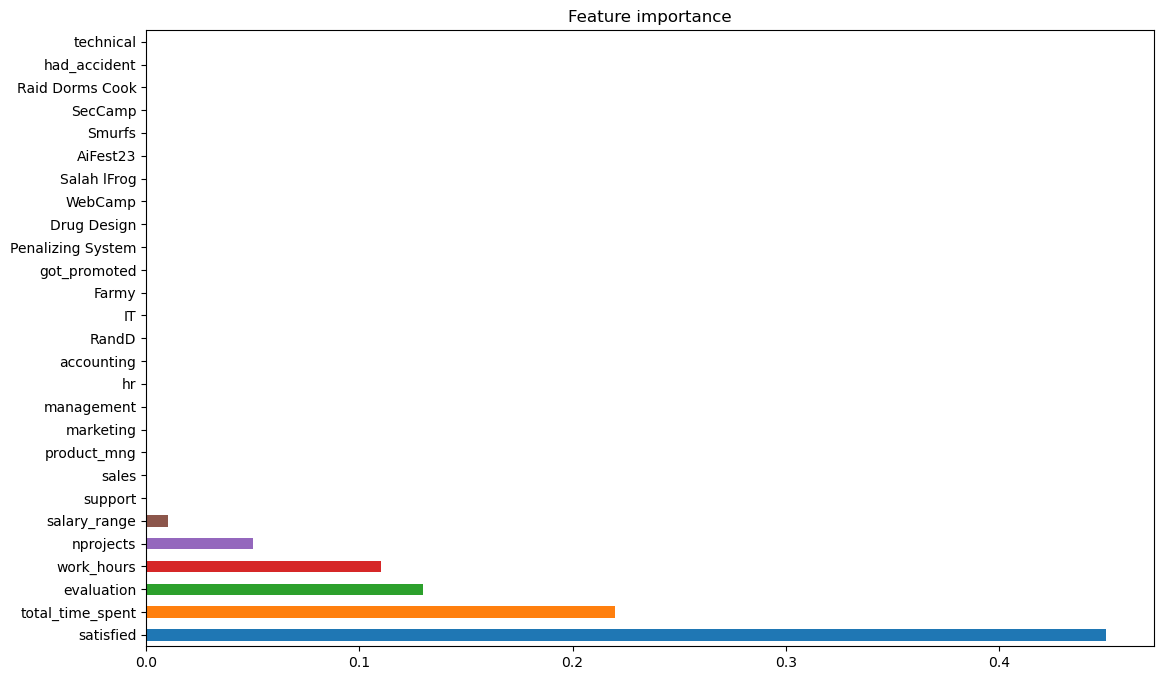

In [469]:
# most important features
feat_importances = pd.Series(np.round(final_classifer.feature_importances_, 2), index=df.columns)
colors = ["C" + str(count) for count in range(0, len(feat_importances))]
feat_importances.nlargest(30).plot(kind='barh', title='Feature importance', color=colors, figsize=(13, 8))

Classification Report:
              precision    recall  f1-score   support

           0     0.9368    0.9637    0.9501      1600
           1     0.8722    0.7920    0.8302       500

    accuracy                         0.9229      2100
   macro avg     0.9045    0.8779    0.8901      2100
weighted avg     0.9214    0.9229    0.9215      2100



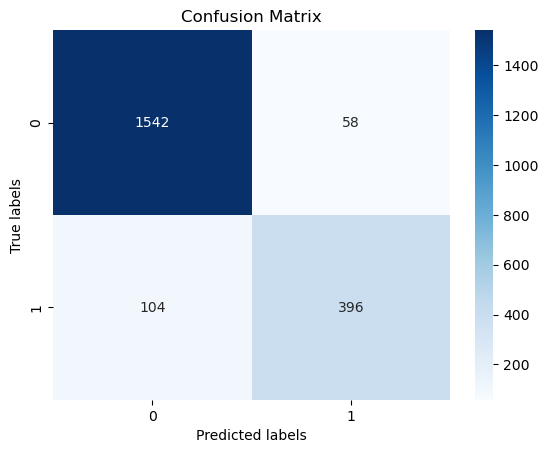

In [472]:
# Initialize the SVM model
svm_svc = SVC()
# Define the hyperparameters and their potential values for grid search
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 10]
}

best_svm_model = GridSearchCV(svm_svc,param_grid,scoring="accuracy").fit(X=X_train,y=y_train)



evaluate_model(best_svm_model,X_test,y_test)
confusion_matrix_model(best_svm_model,X_test,y_test)